In [1]:
# Данные тут
# статья https://statmodeling.stat.columbia.edu/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/
# данные https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime

In [2]:
temp=pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv')
display(temp.head(3))
temp.info()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141422 entries, 0 to 141421
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          141422 non-null  object 
 1   Fremont Bridge Total          141400 non-null  float64
 2   Fremont Bridge East Sidewalk  141400 non-null  float64
 3   Fremont Bridge West Sidewalk  141400 non-null  float64
dtypes: float64(3), object(1)
memory usage: 4.3+ MB


In [3]:
df = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv',
                 index_col='Date', 
                 parse_dates = True).sort_index()
#### нельзя просто удалить дубликаты, произойдет удаление одинакового содержания вместе с различными индексами!!!
#### нужно удалять ИМЕННО олинаковае индексы

df = df[~df.index.duplicated(keep='last')]


## df = df.groupby(df.index).first()

In [4]:
######### 2021 ПАНДЕМИЯ
df = df.loc[:'2021']
df.head(10)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
2012-10-03 05:00:00,31.0,21.0,10.0
2012-10-03 06:00:00,155.0,105.0,50.0
2012-10-03 07:00:00,352.0,257.0,95.0
2012-10-03 08:00:00,437.0,291.0,146.0


In [5]:
display(df.head(5))
display(df.tail(5))
df.info()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2021-04-30 19:00:00,139.0,64.0,75.0
2021-04-30 20:00:00,65.0,27.0,38.0
2021-04-30 21:00:00,34.0,14.0,20.0
2021-04-30 22:00:00,34.0,13.0,21.0
2021-04-30 23:00:00,36.0,12.0,24.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75168 entries, 2012-10-03 00:00:00 to 2021-04-30 23:00:00
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Fremont Bridge Total          75156 non-null  float64
 1   Fremont Bridge East Sidewalk  75156 non-null  float64
 2   Fremont Bridge West Sidewalk  75156 non-null  float64
dtypes: float64(3)
memory usage: 2.3 MB


In [6]:
(df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge West Sidewalk'] != df['Fremont Bridge Total']).sum()

12

In [7]:
df[df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge West Sidewalk'] != df['Fremont Bridge Total']]

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2013-06-14 09:00:00,NaN,NaN,NaN
2013-06-14 10:00:00,NaN,NaN,NaN
2014-03-09 02:00:00,NaN,NaN,NaN
2015-03-08 02:00:00,NaN,NaN,NaN
2015-04-21 11:00:00,NaN,NaN,NaN
2015-04-21 12:00:00,NaN,NaN,NaN
2016-03-13 02:00:00,NaN,NaN,NaN
2017-03-12 02:00:00,NaN,NaN,NaN
2018-03-11 02:00:00,NaN,NaN,NaN


In [8]:
df[df.isna()]

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,NaN,NaN,NaN
2012-10-03 01:00:00,NaN,NaN,NaN
2012-10-03 02:00:00,NaN,NaN,NaN
2012-10-03 03:00:00,NaN,NaN,NaN
2012-10-03 04:00:00,NaN,NaN,NaN
...,...,...,...
2021-04-30 19:00:00,NaN,NaN,NaN
2021-04-30 20:00:00,NaN,NaN,NaN
2021-04-30 21:00:00,NaN,NaN,NaN


In [9]:
dfi = df.interpolate(method='piecewise_polynomial', axis=0);

In [10]:
(dfi['Fremont Bridge East Sidewalk'] + dfi['Fremont Bridge West Sidewalk'] != dfi['Fremont Bridge Total']).sum()

0

In [11]:
# все правильно?

In [12]:
# точно?

In [13]:
# все правильно?

In [14]:
# точно?

In [15]:
# все правильно?

In [16]:
# точно?

In [17]:
dfi.loc['2013-06-14 09:00:00']

Fremont Bridge Total            183.666667
Fremont Bridge East Sidewalk    116.000000
Fremont Bridge West Sidewalk     67.666667
Name: 2013-06-14 09:00:00, dtype: float64

In [18]:
# возвращаемся к df
df=dfi

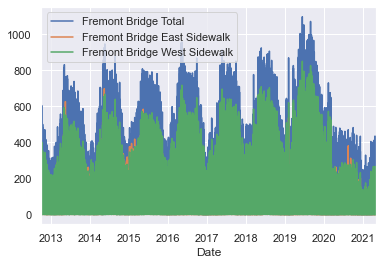

In [19]:
sns.set()
df.plot();

(376944.0, 380568.0)

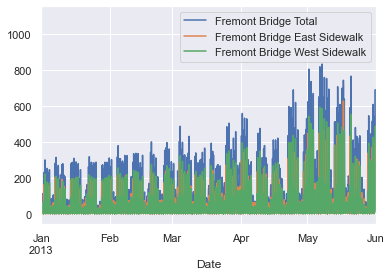

In [20]:
_=df.plot()
_.set_xlim(datetime.datetime(2013,1,1),datetime.datetime(2013,6,1))

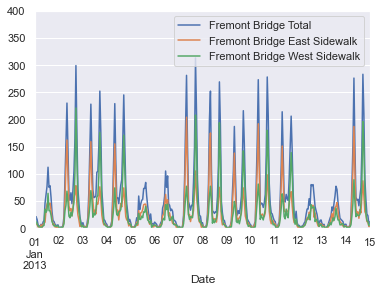

In [21]:
_=df.plot()
_.set_xlim(datetime.datetime(2013,1,1),datetime.datetime(2013,1,15))
_.set_ylim(0,400);

In [22]:
weekly=df.resample('W').sum()
weekly.head(3)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-07,14292.0,7297.0,6995.0
2012-10-14,16795.0,8679.0,8116.0
2012-10-21,15509.0,7946.0,7563.0


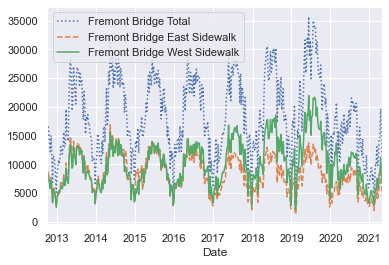

In [23]:
weekly.plot(style=[':','--','-']);

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,3521.0,1760.0,1761.0
2012-10-04,3475.0,1708.0,1767.0
2012-10-05,3148.0,1558.0,1590.0


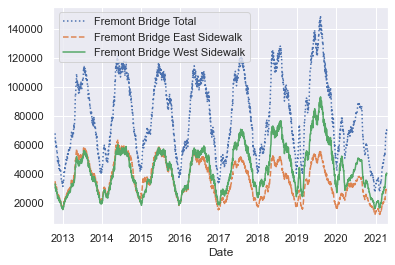

In [24]:
# сглаживание с переносом результата в середину выборки
daily=df.resample('D').sum()
display(daily.head(3))
daily_mean=daily.rolling(30,center=True).sum()
daily_mean.plot(style=[':','--','-']);

In [25]:
# сглаживание с переносом результата в середину выборки
display(daily_mean.head(30))
display(daily_mean.tail(30))

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,NaN,NaN,NaN
2012-10-04,NaN,NaN,NaN
2012-10-05,NaN,NaN,NaN
2012-10-06,NaN,NaN,NaN
2012-10-07,NaN,NaN,NaN
2012-10-08,NaN,NaN,NaN
2012-10-09,NaN,NaN,NaN
2012-10-10,NaN,NaN,NaN
2012-10-11,NaN,NaN,NaN


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2021-04-01,56219.0,23717.0,32502.0
2021-04-02,56963.0,24022.0,32941.0
2021-04-03,59663.0,25270.0,34393.0
2021-04-04,61620.0,26262.0,35358.0
2021-04-05,63103.0,26760.0,36343.0
2021-04-06,65453.0,27702.0,37751.0
2021-04-07,67276.0,28520.0,38756.0
2021-04-08,67531.0,28666.0,38865.0
2021-04-09,68860.0,29271.0,39589.0


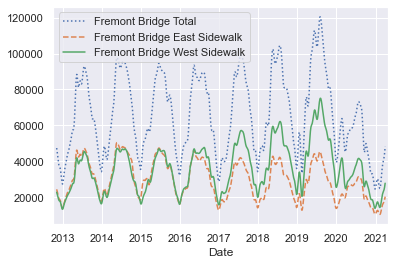

In [26]:
daily_gauss=daily.rolling(60,center=True,win_type='gaussian').sum(std=10)
daily_gauss.plot(style=[':','--','-']);

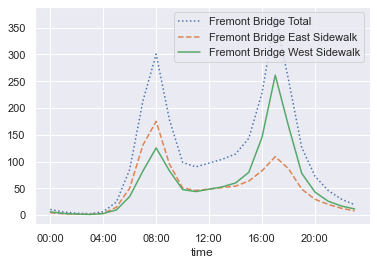

In [27]:
day_time=df.groupby(df.index.time).mean()
hourly_ticks=day_time.index.values[::4]
g=day_time.plot(style=[':','--','-']);
g.set_xticks(hourly_ticks);

In [28]:
df.groupby(df.index.dayofweek).mean()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
0,125.997576,55.708613,70.288963
1,134.204512,59.615679,74.588833
2,133.719587,59.453032,74.266555
3,126.998233,56.806548,70.191685
4,115.374814,51.588449,63.786365
5,65.482383,32.541107,32.941275
6,63.236717,31.806208,31.430509


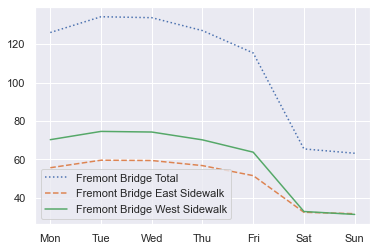

In [29]:
week_day=df.groupby(df.index.dayofweek).mean()
#  внимание смотреть тут  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
week_name=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
week_day.index=week_name

g=week_day.plot(style=[':','--','-'])
#g.set_xticks(np.arange(len(week_name)));# тут нужно объяснить, что нумерация идет с 1, поэтому танец с бубном!
#g.set_xticklabels(week_name);

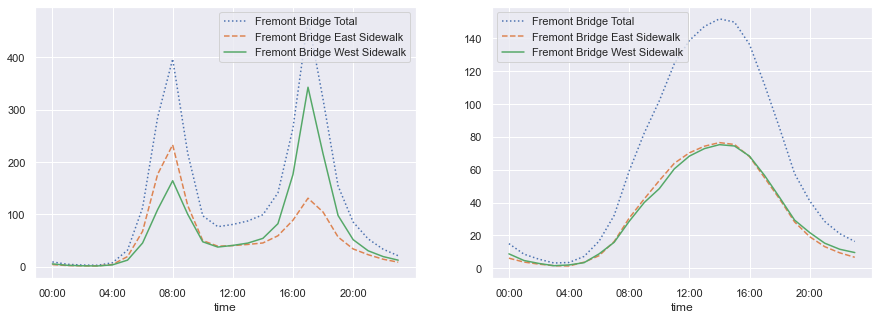

In [30]:
day_type=np.where(df.index.dayofweek<5,'Workday','Weekend')
by_day=df.groupby([day_type,df.index.time]).mean()

fig , ax = plt.subplots(1,2,figsize=(15,5))

by_day.loc['Workday'].plot(ax=ax[0],xticks=hourly_ticks,style=[':','--','-']);
by_day.loc['Weekend'].plot(ax=ax[1],xticks=hourly_ticks,style=[':','--','-']);

In [31]:
day_month=df.index.month
by_month_day=df.groupby([day_month,day_type,df.index.time]).mean()
display(by_month_day)
by_month_day.index.names

Fremont Bridge Total  Fremont Bridge East Sidewalk  \
Date                                                                        
1    Weekend 00:00:00              9.038462                      3.653846   
             01:00:00              5.205128                      2.384615   
             02:00:00              3.282051                      1.461538   
             03:00:00              1.679487                      0.782051   
             04:00:00              2.025641                      0.935897   
...                                     ...                           ...   
12   Workday 19:00:00             70.080808                     21.964646   
             20:00:00             37.636364                     13.146465   
             21:00:00             24.838384                      9.217172   
             22:00:00             17.196970                      7.267677   
             23:00:00             11.141414                      4.575758   

                       Fremont Bridge West Sidewalk  
Date                                                 
1    Weekend 00:00:00                      5.384615  
             01:00:00                      2.820513  
             02:00:00                      1.820513  
             03:00:00                      0.897436  
             04:00:00                      1.089744  
...                                             ...  
12   Workday 19:00:00                     48.116162  
             20:00:00                     24.489899  
             21:00:00                     15.621212  
             22:00:00                      9.929293  
             23:00:00                      6.565657  

[576 rows x 3 columns]

FrozenList(['Date', None, None])

In [32]:
by_month_day.index.names=['month','day','time']
by_month_day

Fremont Bridge Total  Fremont Bridge East Sidewalk  \
month day     time                                                           
1     Weekend 00:00:00              9.038462                      3.653846   
              01:00:00              5.205128                      2.384615   
              02:00:00              3.282051                      1.461538   
              03:00:00              1.679487                      0.782051   
              04:00:00              2.025641                      0.935897   
...                                      ...                           ...   
12    Workday 19:00:00             70.080808                     21.964646   
              20:00:00             37.636364                     13.146465   
              21:00:00             24.838384                      9.217172   
              22:00:00             17.196970                      7.267677   
              23:00:00             11.141414                      4.575758   

                        Fremont Bridge West Sidewalk  
month day     time                                    
1     Weekend 00:00:00                      5.384615  
              01:00:00                      2.820513  
              02:00:00                      1.820513  
              03:00:00                      0.897436  
              04:00:00                      1.089744  
...                                              ...  
12    Workday 19:00:00                     48.116162  
              20:00:00                     24.489899  
              21:00:00                     15.621212  
              22:00:00                      9.929293  
              23:00:00                      6.565657  

[576 rows x 3 columns]

In [44]:
df_1=by_month_day.reset_index()
df_1.

(576, 6)

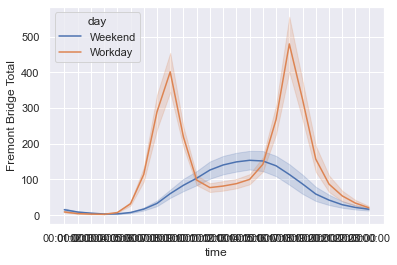

In [39]:
sns.lineplot(x = df_1['time'].astype(str), 
             y='Fremont Bridge Total', 
             hue = 'day', 
             data = df_1);

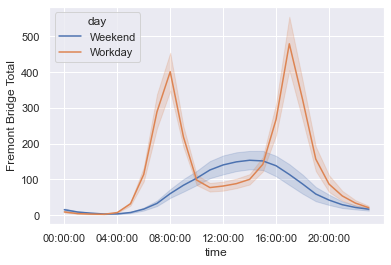

In [43]:
sns.lineplot(x=df_1['time'].astype(str), y='Fremont Bridge Total', hue='day', data = df_1);
plt.xticks(hourly_ticks.astype(str));

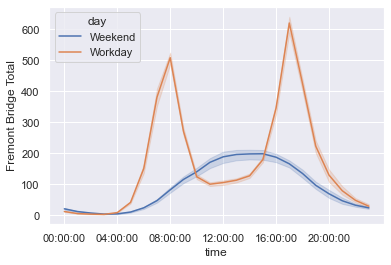

In [41]:
df_2 = df_1[df_1.month.isin([5,6,7,8,9])]
sns.lineplot( x=df_2['time'].astype(str), y='Fremont Bridge Total', hue='day', data=df_2)
plt.xticks(hourly_ticks.astype(str));

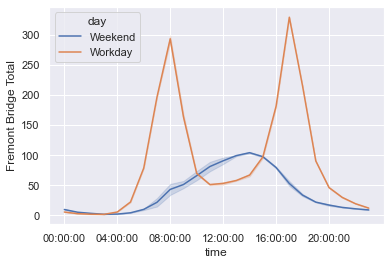

In [42]:
df_3 = df_1[df_1.month.isin([1,2])]
sns.lineplot( x=df_3['time'].astype(str), y='Fremont Bridge Total', hue='day', data=df_3, estimator=np.median)
plt.xticks(hourly_ticks.astype(str));